## X-ray image classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

In [11]:
data = pd.read_csv("archive (5)/Chest_xray_Corona_Metadata.csv")

In [4]:
data

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


There are 5910 chest X-ray images in our dataset!

In [6]:
data['Label'].value_counts()

Pnemonia    4334
Normal      1576
Name: Label, dtype: int64

In [7]:
data['Label_2_Virus_category'].value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

In [8]:
data['Label_1_Virus_category'].value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

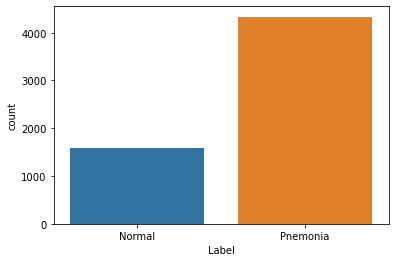

In [9]:
sns.countplot(x=data['Label'])

<AxesSubplot:xlabel='Label_2_Virus_category', ylabel='count'>

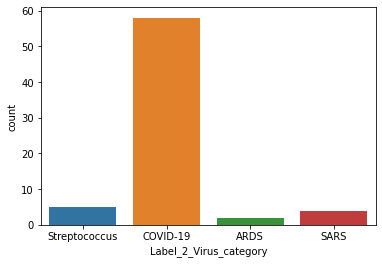

In [10]:
sns.countplot(x=data['Label_2_Virus_category'])

Since I will be trying to detect COVID from X-Rays, I will label the other pnuemonia virus as just pnuemonia. Since during the pandemic, COVID-19 will be much more prelavent in the society.

Hence the images will have 3 classes. First, X_ray images of normal lungs. Second, X_ray images of lungs with Pnuemonia. Thirdly, X_ray images of lungs infected with COVID-19.

###### Data Preprocessing

In [12]:
Train_normal= list(data[(data['Dataset_type']=='TRAIN')&(data['Label']=='Normal')]['X_ray_image_name'])

In [13]:
Train_covid=list(data[(data['Dataset_type']=='TRAIN')&(data['Label_2_Virus_category']=='COVID-19')]['X_ray_image_name'])

In [14]:
Train_pnuemonia=list(data[(data['Dataset_type']=='TRAIN')&(data['Label']=='Pnemonia')&(data['Label_2_Virus_category']!='COVID-19')]['X_ray_image_name'])

In [14]:
data['Dataset_type'].value_counts()

TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64

In [15]:
len(Train_normal)+len(Train_covid)+len(Train_pnuemonia)

5286

We have correctly seperated our train data into 3 separate classes.

In [15]:
Test_normal= list(data[(data['Dataset_type']=='TEST')&(data['Label']=='Normal')]['X_ray_image_name'])

In [16]:
Test_covid=list(data[(data['Dataset_type']=='TEST')&(data['Label_2_Virus_category']=='COVID-19')]['X_ray_image_name'])

In [17]:
Test_pnuemonia=list(data[(data['Dataset_type']=='TEST')&(data['Label']=='Pnemonia')&(data['Label_2_Virus_category']!='COVID-19')]['X_ray_image_name'])

In [19]:
len(Test_normal)+len(Test_covid)+len(Test_pnuemonia)

624

Our train data and test data list has been prepared, now we move the images to respective folders.

In [20]:
import shutil
for i in Train_normal:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Normal"
    shutil.move(original,target)

In [21]:
for i in Train_pnuemonia:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Pneumonia"
    shutil.move(original,target)

In [22]:
for i in Train_covid:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Covid"
    shutil.move(original,target)

Now we move the Test data into the respective folders

In [24]:
for i in Test_normal:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Normal"
    shutil.move(original,target)

for i in Test_pnuemonia:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Pneumonia"
    shutil.move(original,target)
    
for i in Test_covid:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Covid"
    shutil.move(original,target)

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory("archive (5)/Train",class_mode='categorical',target_size=(150,150))

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("archive (5)/Test",batch_size=32,class_mode='categorical',target_size=(150,150))


Found 5286 images belonging to 3 classes.
Found 632 images belonging to 3 classes.


In [31]:
for i in training_set[0]:
    print(i.shape)

(32, 64, 64, 3)
(32, 3)


In [2]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Model


cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))

cnn.add(BatchNormalization())

cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn.add(BatchNormalization())

cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(units=3,activation='softmax'))

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 100,callbacks=[early_stop],verbose=1)

Epoch 1/100
166/166 [==============================] - 143s 857ms/step - loss: 2.3620 - accuracy: 0.7897 - val_loss: 8.4681 - val_accuracy: 0.6187
Epoch 2/100
166/166 [==============================] - 110s 659ms/step - loss: 0.4299 - accuracy: 0.8605 - val_loss: 7.2659 - val_accuracy: 0.6171
Epoch 3/100
166/166 [==============================] - 110s 660ms/step - loss: 0.3537 - accuracy: 0.8919 - val_loss: 1.4066 - val_accuracy: 0.6630
Epoch 4/100
166/166 [==============================] - 108s 652ms/step - loss: 0.3004 - accuracy: 0.8943 - val_loss: 2.6337 - val_accuracy: 0.6203
Epoch 5/100
166/166 [==============================] - 109s 656ms/step - loss: 0.2986 - accuracy: 0.8995 - val_loss: 8.0297 - val_accuracy: 0.3956
Epoch 6/100
166/166 [==============================] - 109s 658ms/step - loss: 0.3078 - accuracy: 0.8946 - val_loss: 0.9807 - val_accuracy: 0.6994
Epoch 7/100
166/166 [==============================] - 112s 674ms/step - loss: 0.3101 - accuracy: 0.9010 - val_loss: 1

In [10]:
cnn.save('X-Ray multiclassification.h5')

<AxesSubplot:>

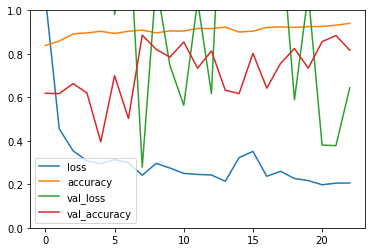

In [7]:
model_loss = pd.DataFrame(cnn.history.history)
model_loss.plot(ylim=(0,1))

In [8]:
from sklearn.metrics import confusion_matrix


p_test = cnn.predict(test_set).argmax(axis=1)

print(confusion_matrix(test_set.classes,p_test))

[[  0   4   4]
 [  2 124 108]
 [  0 197 193]]


In [60]:
test_set.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_set.labels,p_test))
print('\n')
print(classification_report(test_set.labels,p_test,target_names=test_set.class_indices))
print('\n')


[[  0   4   4]
 [  2 124 108]
 [  0 197 193]]


              precision    recall  f1-score   support

       Covid       0.00      0.00      0.00         8
      Normal       0.38      0.53      0.44       234
   Pneumonia       0.63      0.49      0.56       390

    accuracy                           0.50       632
   macro avg       0.34      0.34      0.33       632
weighted avg       0.53      0.50      0.51       632





Model performed poorly for three classes.

In [18]:
import shutil
for i in Train_covid:
    original = r"archive (5)/Train/Covid/{}".format(i)
    target = r"archive (5)/Train/Pneumonia"
    shutil.move(original,target)
    
for i in Test_covid:
    original = r"archive (5)/Test/Covid/{}".format(i)
    target = r"archive (5)/Test/Pneumonia"
    shutil.move(original,target)    

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory("archive (5)/Train",class_mode='binary',target_size=(150,150))

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("archive (5)/Test",batch_size=32,class_mode='binary',target_size=(150,150))


Found 5286 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,MaxPool2D, Dropout,BatchNormalization

cnn2 = tf.keras.models.Sequential()

cnn2.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))

cnn2.add(BatchNormalization())

cnn2.add(MaxPool2D(pool_size=2,strides=2))

cnn2.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn2.add(BatchNormalization())

cnn2.add(MaxPool2D(pool_size=2,strides=2))

cnn2.add(Flatten())

cnn2.add(Dense(units=128,activation='relu'))
cnn2.add(Dropout(0.2))

cnn2.add(Dense(units=1,activation='sigmoid'))

In [5]:
cnn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn2.fit(x = training_set, validation_data = test_set, epochs = 100,callbacks=[early_stop],verbose=1)

Epoch 1/100
166/166 [==============================] - 138s 828ms/step - loss: 1.3690 - accuracy: 0.8328 - val_loss: 10.4612 - val_accuracy: 0.6250
Epoch 2/100
166/166 [==============================] - 107s 644ms/step - loss: 0.2414 - accuracy: 0.9081 - val_loss: 3.6015 - val_accuracy: 0.6298
Epoch 3/100
166/166 [==============================] - 107s 643ms/step - loss: 0.1782 - accuracy: 0.9353 - val_loss: 0.8571 - val_accuracy: 0.6474
Epoch 4/100
166/166 [==============================] - 115s 693ms/step - loss: 0.1968 - accuracy: 0.9240 - val_loss: 0.9403 - val_accuracy: 0.8125
Epoch 5/100
166/166 [==============================] - 128s 768ms/step - loss: 0.1733 - accuracy: 0.9335 - val_loss: 32.0521 - val_accuracy: 0.3766
Epoch 6/100
166/166 [==============================] - 102s 610ms/step - loss: 0.1832 - accuracy: 0.9270 - val_loss: 3.9372 - val_accuracy: 0.6266
Epoch 7/100
166/166 [==============================] - 109s 656ms/step - loss: 0.1807 - accuracy: 0.9281 - val_loss:

<AxesSubplot:>

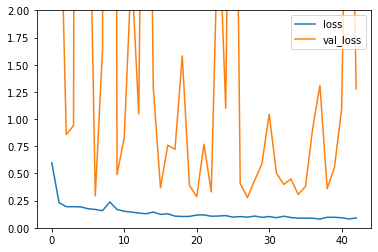

In [12]:
model2_loss = pd.DataFrame(cnn2.history.history)
model2_loss[['loss','val_loss']].plot(ylim=(0,2))

Our validation loss is like a heart rate monitor, however it still shows a general downward trend, further tuning of the model might be required.

<AxesSubplot:>

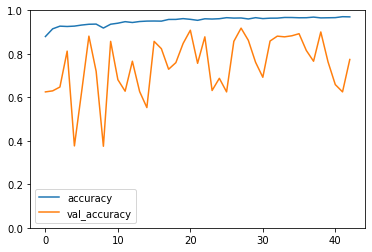

In [14]:
model2_loss = pd.DataFrame(cnn2.history.history)
model2_loss[['accuracy','val_accuracy']].plot(ylim=(0,1))

In [34]:
cnn2.save('Binary prediction.h5')

In [16]:
pred = cnn2.predict_classes(test_set)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_set.classes,pred))
print('\n')
print(classification_report(test_set.classes,pred,target_names=test_set.class_indices))
print('\n')
print('Accuracy score {:.2f}'.format(accuracy_score(test_set.classes,pred)*100))


[[ 43 191]
 [ 52 338]]


              precision    recall  f1-score   support

      Normal       0.45      0.18      0.26       234
   Pneumonia       0.64      0.87      0.74       390

    accuracy                           0.61       624
   macro avg       0.55      0.53      0.50       624
weighted avg       0.57      0.61      0.56       624



Accuracy score 61.06


This binary classification model is better than the multiclass classification model with a higher accuracy, as well as a higher recall for Pnuemonia class which is important as it is better to be safe than sorry for covide detection.

We can even increase recall further by ensuring that if the predicted probability of class 1 is >0.4, then the data is labelled as pnuemonia, however that will cause the precision to decrease, showing the precision recall tradeoff.

Perhaps both models could be improved on with balancing the classes of data as there is only 58 pictures that are labelled covid which shows the class imbalance. We can oversample using data augmentation and we can also tune the parameters of our model better. Another way to improve our model is using transfer learning which I will do so in the next part!